# Bermudan Swaption using HW Model

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from financepy.utils import *
from financepy.products.bonds import *
from financepy.market.curves import *
from financepy.products.rates import *

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [3]:
settlement_date = Date(1, 1, 2007)

We set up the discount curve

In [4]:
zero_dates = [Date(1,1,2008), Date(1,1,2009), Date(1,1,2010)]
zero_rates = [0.035, 0.04, 0.045]

In [5]:
discount_curve = DiscountCurveZeros(settlement_date, zero_dates, zero_rates, 
                                      FrequencyTypes.ANNUAL)

First create a bond that we will use as a reference

In [10]:
issue_date = Date(1, 1, 2000)
maturity_date = Date(1, 1, 2010)
coupon = 0.0525
frequencyType = FrequencyTypes.ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA

In [11]:
bond = Bond(issue_date, maturity_date, coupon, frequencyType, accrual_type)

In [12]:
v = bond.clean_price_from_discount_curve(settlement_date, discount_curve)

In [13]:
print("Pure Bond Price:", v)

Pure Bond Price: 100.69375242268887


## Set up the Puttable Bond

Now specify the put and call dates

In [16]:
call_dates = []
call_prices = []
start_date = Date(1, 1, 2008)
years = np.linspace(0.0, 2.0, 50)
put_dates = start_date.add_years(years)
put_prices = [100.0] * len(put_dates)

Now create the BondEmbeddedOption

In [18]:
puttableBond = BondEmbeddedOption(issue_date, maturity_date, coupon, frequencyType, accrual_type,
                                     call_dates, call_prices, put_dates, put_prices)

### The Hull-White Model

In [19]:
sigma = 0.01  # basis point volatility
a = 0.1
num_time_steps = 200

In [20]:
model = HWTree(sigma, a, num_time_steps)

In [21]:
v = puttableBond.value(settlement_date, discount_curve, model)

In [22]:
print(v)

{'bondwithoption': 102.91602161328575, 'bondpure': 102.14234331620244}


## Convergence Testing

In [23]:
timeSteps = range(200, 500, 1)
values = []
for num_time_steps in timeSteps:
    model = HWTree(sigma, a, num_time_steps)
    v = puttableBond.value(settlement_date, discount_curve, model)
    values.append(v['bondwithoption'])

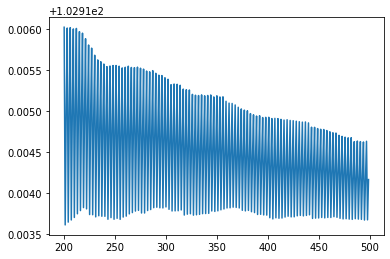

In [24]:
plt.plot(timeSteps, values)

In [25]:
values[-1]

102.91416511246226

Matlab finds 102.9127

Copyright (c) 2020 Dominic O'Kane